In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from IPython.core.display_functions import display
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor  # or GradientBoostingClassifier, based on your problem
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import rankdata
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import r2_score

In [26]:
df = pd.read_csv("diamonds.csv")

In [27]:
print(df.columns)

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')


In [28]:
columns_to_keep = ["total_sales_price", "carat_weight"]
df = df.loc[:, columns_to_keep]

limit = 30000

df = df[df['total_sales_price'] <= limit]

# display(df_filtered)

In [29]:
display(df)

,total_sales_price,carat_weight
0,200,0.09
1,200,0.09
2,200,0.09
3,200,0.09
4,200,0.09
...,...,...
211925,30000,5.00
211926,30000,2.51
211927,30000,2.00
211928,30000,2.50


In [30]:
df['squared_carat_weight'] = df['carat_weight']**2
df['cubed_carat_weight'] = df['carat_weight']**3

display(df)

,total_sales_price,carat_weight,squared_carat_weight,cubed_carat_weight
0,200,0.09,0.0081,0.000729
1,200,0.09,0.0081,0.000729
2,200,0.09,0.0081,0.000729
3,200,0.09,0.0081,0.000729
4,200,0.09,0.0081,0.000729
...,...,...,...,...
211925,30000,5.00,25.0000,125.000000
211926,30000,2.51,6.3001,15.813251
211927,30000,2.00,4.0000,8.000000
211928,30000,2.50,6.2500,15.625000


                            OLS Regression Results                            
Dep. Variable:      total_sales_price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                 2.731e+05
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:49:27   Log-Likelihood:            -1.9472e+06
No. Observations:              211930   AIC:                         3.894e+06
Df Residuals:                  211926   BIC:                         3.894e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2015.9185 

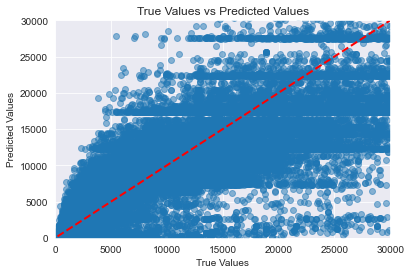

In [31]:
X = df.drop('total_sales_price', axis=1)
y = df['total_sales_price']

# Adding a constant to the independent variables (X)
X = sm.add_constant(X)

# Implementing OLS
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Printing the summary of the OLS model
print(model.summary())

# Evaluating the model
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

plt.scatter(y, predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)

# Set x and y-axis limits
plt.xlim(0, limit)
plt.ylim(0, limit)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()


In [32]:
# # split training and test data 80/20
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# # Initialize the KNN model with a specific number of neighbors, e.g., 5
# knn = KNeighborsRegressor(n_neighbors=20)
#
# # train the model
# knn.fit(X_train, y_train)
#
# # make predictions
# y_pred = knn.predict(X_test)
#
# # check preformance
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# total_sales_mean = df['total_sales_price'].mean()
#
# print(f"Mean of target Variable: {total_sales_mean:.2f}")
# print(f"Mean Absolute Error: {mae:.2f}")
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"Root Mean Squared Error: {rmse:.2f}")
# print(f"R-squared: {r2:.2f}")

Mean of target Variable: 4037.59
Mean Absolute Error: 1145.38
Mean Squared Error: 5438882.48
Root Mean Squared Error: 2332.14
R-squared: 0.80
